 Bike Sharing Assignment
Here, we will be building a Machine Learning Model based in the data provided
The model to be built will be a linear regressiong model.

We will be working with the following steps:
Step 1: Reading, Understanding and Visualising  the data
Step 2: Spliting the data into Train and Test Data
Step 3: Build and train the model
Step 4: Residual Analysis
Step 5: Look at the Predictions and evaluate the model with Test data

In [172]:
# Step 1:
# We need to Read and Understand the Data 
# To do the above, we need to import required libraries and the data set
# If required we will add libraries as required

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [174]:
pd.set_option('display.max_columns',40)


In [175]:
#reading the data sheet
os.chdir(r'C:\Users\Dell\Desktop\Bike Sharing Assignment')
boombike = pd.read_csv('day.csv')

In [176]:
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [177]:
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [178]:
boombike.shape

(730, 16)

In [179]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [180]:
# Now that we have imported the data sheet
# We have studied the data 
# lets move to step 2 and visualize the data

In [181]:
#Step 2:

<AxesSubplot:>

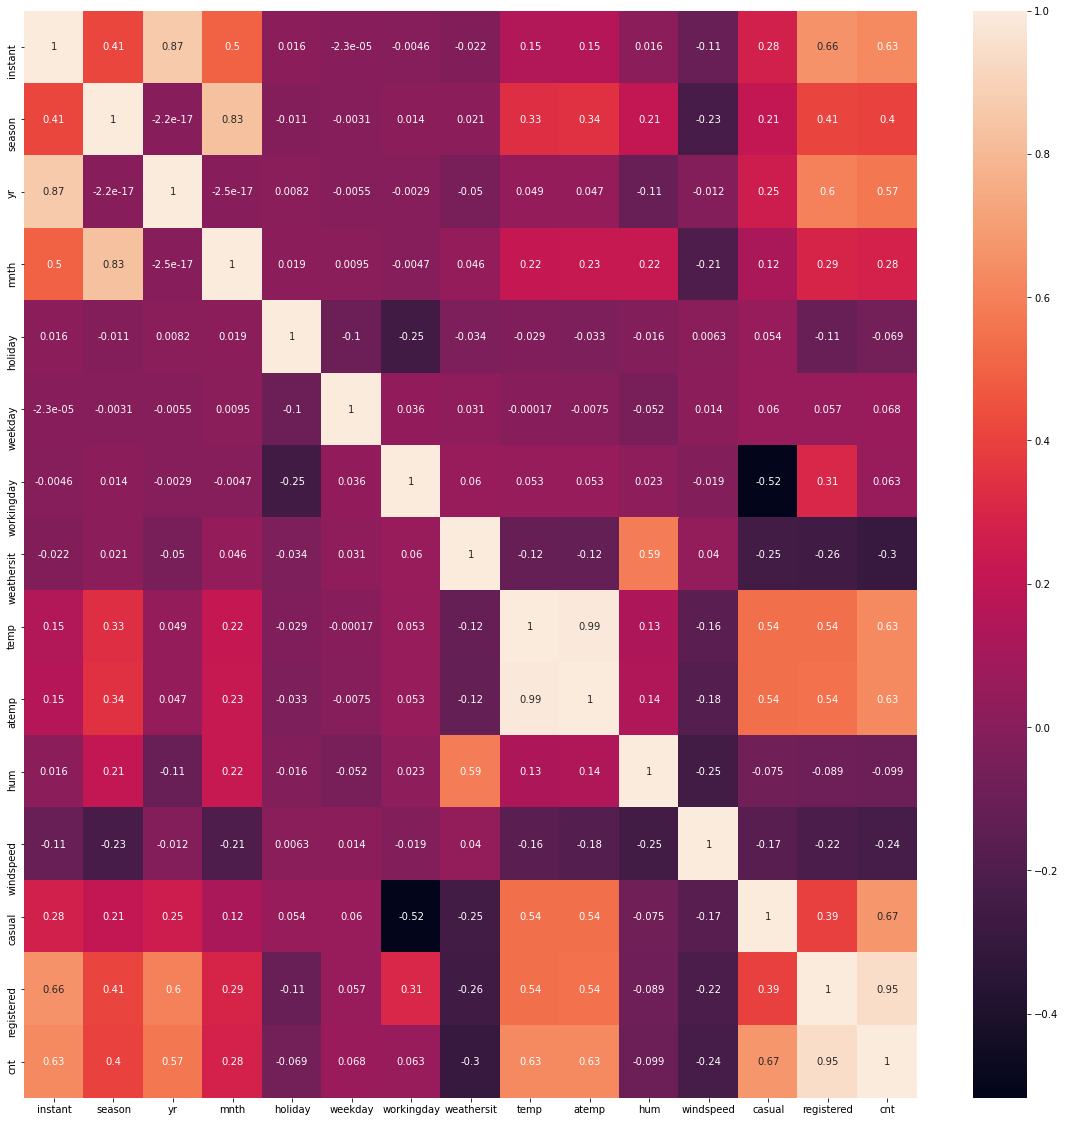

In [182]:
# Checking Corelations in between the data with a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(boombike.corr(), annot = True)

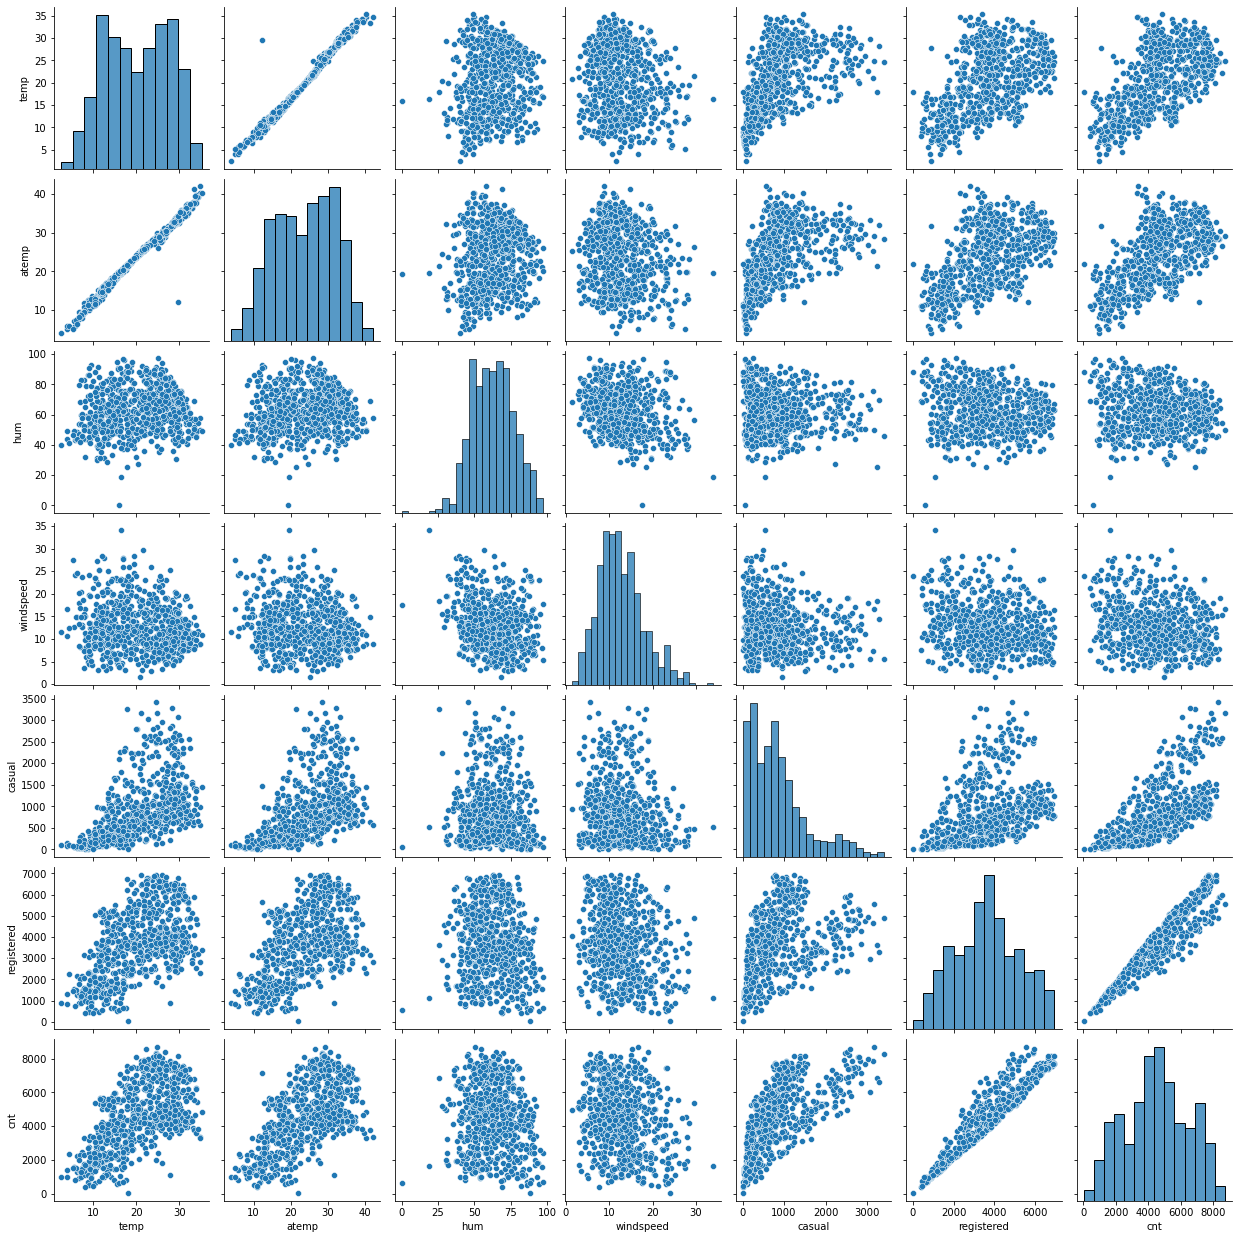

In [183]:
# Lets check the pairplot
num_var = boombike[['temp','atemp','hum','windspeed','casual','registered','cnt']]
sns.pairplot(num_var)
plt.show()

In [184]:
# From the above charts, we see that
# - temp and atemp variable are highly corelated
# - As the temperature increases the no. of users will also increase (Which makes sense as in colder reagions people will prefer to move in cars)


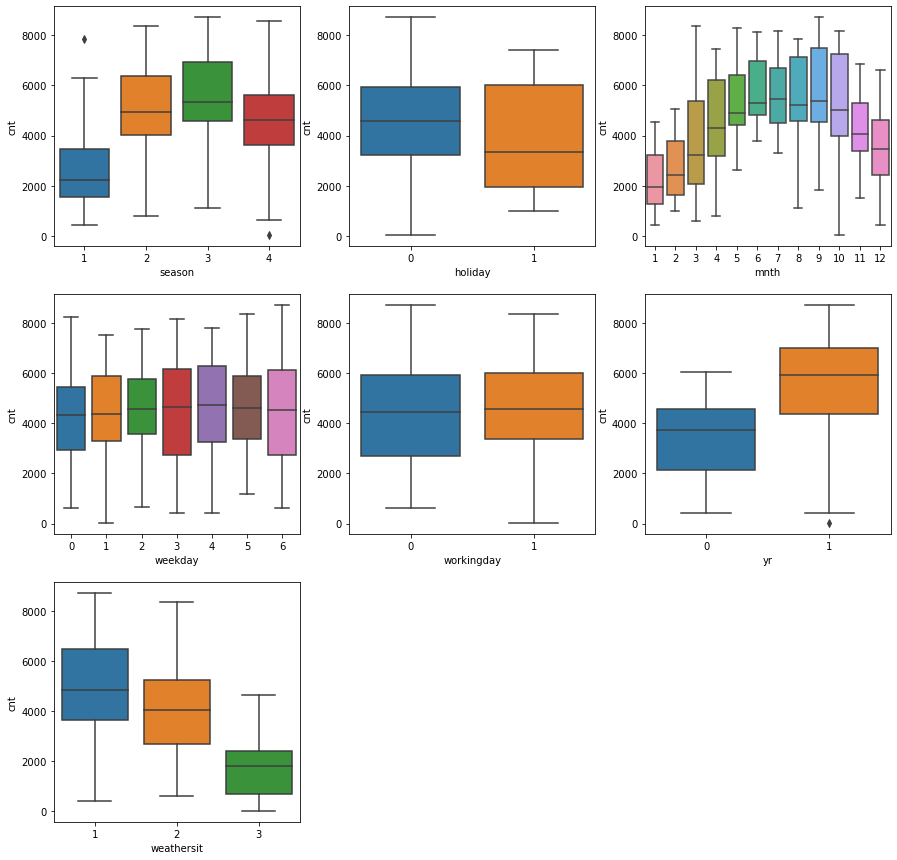

In [185]:
# Loop for many cate data
plt.figure(figsize = (15,15))
car_var = ['season','holiday','mnth','weekday','workingday','yr','weathersit']
for i in enumerate(car_var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = boombike)

In [186]:
# From the above plot, we see that
# - Demand for bike is more in summmer and fall season
# - We can see that bike are used more on a working day than a holiday
# - Day of the weel dont seem to have much effect on the demand
# - More bikes were rented in 2019 to 2018


In [187]:
# Now that we have seen the impact on various feartures on the demand
# lets prepare the data

In [188]:
# we will be dropping columns that are not useful
boombike = boombike.drop(['instant','dteday','casual','registered'], axis=1)
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [189]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


For Weekday mnth season weathersit we will create dummy variables
- Weekday (0:Sunday,1:Monday,2:TUesday, 3:Wednesday, 4: Thursday, 5:Friday, 6:Saturday)
mnth: Month (1to12 = Jan - Dec)
Season: Season (1:Spring,2:Spring,3:Fall,4:Winter)
Weather: 1:Clear, 2:Mist, 3:Light Snow, 4: Heavy Rain

In [190]:
# Dummy for weekday
varlist = ['weekday']

def binary_map(x):
    return x.map({1:'monday', 2: 'tuesday',3:'wednesday',4:'thursday',5:'friday', 6:'saturday',0:'sunday'})
    
boombike[varlist]=boombike[varlist].apply(binary_map)

In [191]:
# Dummy for Season
varlist =  ['season']

def binary_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

boombike[varlist] = boombike[varlist].apply(binary_map)

In [192]:
# Dummy for Mnth
varlist =  ['mnth']

def binary_map(x):
    return x.map({1: 'jan', 2: 'feb',3:'march',4:'april',5:'may', 6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})

boombike[varlist] = boombike[varlist].apply(binary_map)

In [193]:
#Dummy for Weathersit
varlist =  ['weathersit']

def binary_map(x):
    return x.map({1:'Clear', 2:'Mist and Few clouds', 3:'Light Snow', 4:'Heavy Rain '})

boombike[varlist] = boombike[varlist].apply(binary_map)

In [194]:
# Lets check the dummies that we have created here
Seasons= pd.get_dummies(boombike['season'])
Months= pd.get_dummies(boombike['mnth'])
Weekday= pd.get_dummies(boombike['weekday'])
Weather= pd.get_dummies(boombike['weathersit'])

In [195]:
Seasons.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [196]:
# Dropping the first column from status1 

Seasons = pd.get_dummies(boombike['season'],drop_first = True)
Seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [197]:
Months.head()

,april,aug,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [198]:
Months = pd.get_dummies(boombike['mnth'], drop_first = True)
Months

,aug,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [199]:
Weekday.head()

,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [200]:
# Dropping first column
Weekday = pd.get_dummies(boombike['weekday'], drop_first = True)
Weekday

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [201]:
Weather.head()

,Clear,Light Snow,Mist and Few clouds
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [202]:
# Dropping first column of Weather
Weather = pd.get_dummies(boombike['weathersit'], drop_first =True)
Weather

,Light Snow,Mist and Few clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [203]:
# Lets add the above dfs in original df
boombike = pd.concat([boombike, Seasons,Months,Weekday,Weather], axis =1)

In [204]:
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
0,spring,0,jan,0,saturday,0,Mist and Few clouds,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sunday,0,Mist and Few clouds,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [205]:
boombike=boombike.drop(['season','mnth','weekday','weathersit'],axis=1)

In [206]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   spring               730 non-null    uint8  
 9   summer               730 non-null    uint8  
 10  winter               730 non-null    uint8  
 11  aug                  730 non-null    uint8  
 12  dec                  730 non-null    uint8  
 13  feb                  730 non-null    uint8  
 14  jan                  730 non-null    uint8  
 15  july                 730 non-null    uin

In [207]:
boombike.shape

(730, 30)

<AxesSubplot:>

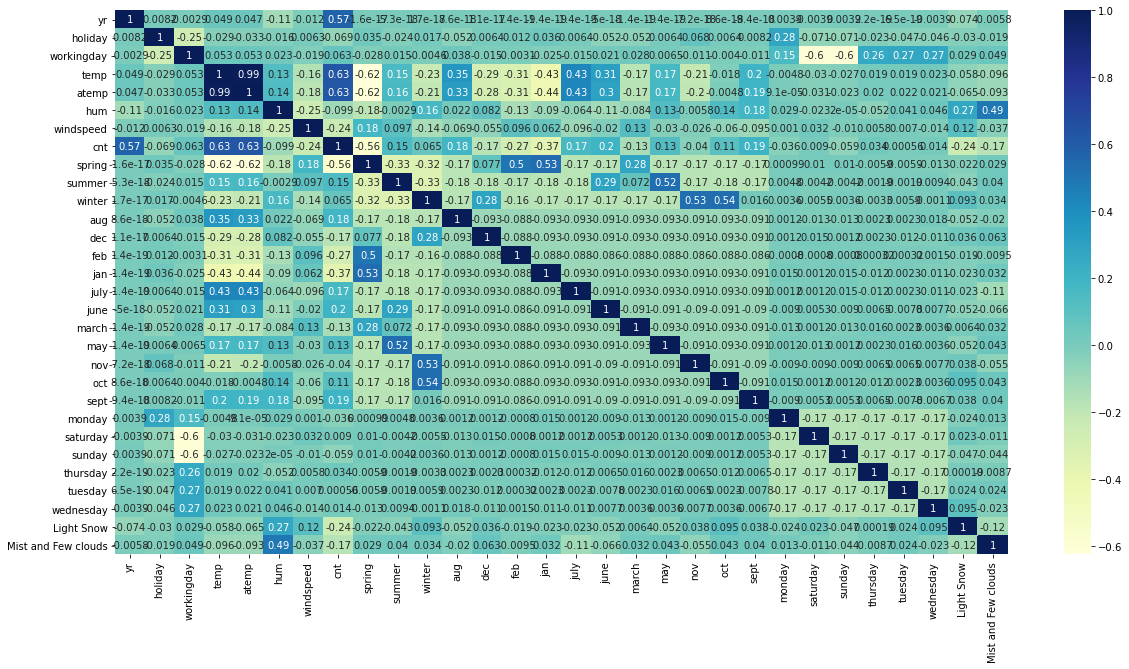

In [208]:
plt.figure(figsize = (20,10))
sns.heatmap(boombike.corr(),cmap="YlGnBu", annot = True)

In [209]:
# Step 3:
# Here, we will split the complete data into train and test
# We will split the data in 70/30 split
# We need to import libraries

from sklearn.model_selection import train_test_split
bb_train,bb_test = train_test_split(boombike, train_size=0.7, random_state=100)

In [210]:
# let us check the split of the data
print(bb_train.shape)
print(bb_test.shape)

(510, 30)
(220, 30)


In [211]:
#  Rescaling the Features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [212]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
bb_train[num_vars] = scaler.fit_transform(bb_train[num_vars])
bb_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [213]:
bb_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    float64
 8   spring               510 non-null    uint8  
 9   summer               510 non-null    uint8  
 10  winter               510 non-null    uint8  
 11  aug                  510 non-null    uint8  
 12  dec                  510 non-null    uint8  
 13  feb                  510 non-null    uint8  
 14  jan                  510 non-null    uint8  
 15  july                 510 non-null    u

In [214]:
bb_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
bb_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    float64
 8   spring               510 non-null    uint8  
 9   summer               510 non-null    uint8  
 10  winter               510 non-null    uint8  
 11  aug                  510 non-null    uint8  
 12  dec                  510 non-null    uint8  
 13  feb                  510 non-null    uint8  
 14  jan                  510 non-null    uint8  
 15  july                 510 non-null    u

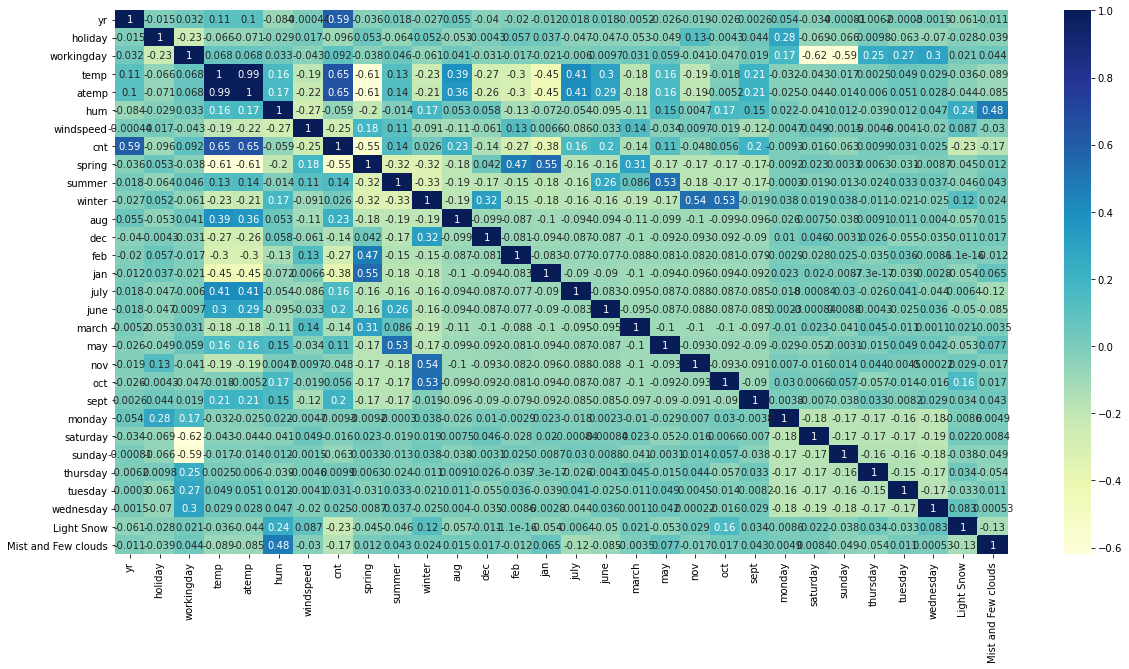

In [216]:
# Let us check the correlation with heat map
plt.figure(figsize = (20,10))
sns.heatmap(bb_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

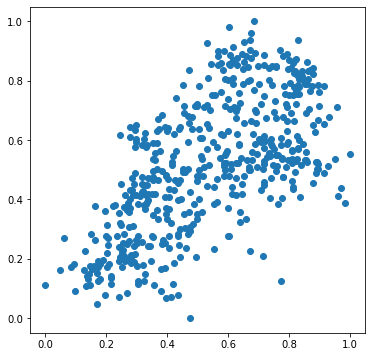

In [217]:
# Lets check the pairplot
plt.figure(figsize=[6,6])
plt.scatter(bb_train.temp, bb_train.cnt)
plt.show()

In [218]:
# Splitting X and Y 
y_train = bb_train.pop('cnt')
X_train = bb_train

In [219]:
#Step 5: Building the Model

In [220]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [221]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [222]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [223]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [224]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sept', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 12),
 ('Light Snow', True, 1),
 ('Mist and Few clouds', True, 1)]

In [225]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'july', 'sept', 'saturday', 'Light Snow',
       'Mist and Few clouds'],
      dtype='object')

In [226]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'march', 'may', 'nov', 'oct',
       'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [227]:
X_train[col]

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,jan,july,sept,saturday,Light Snow,Mist and Few clouds
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,1


We will start with all the features and then remove 1 by 1 depending in the P and vif values

In [229]:
# Model A
X_train_new = X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)

In [232]:
#Lets run the model
lm = sm.OLS(y_train,X_train_rfe).fit()
# Checking the results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          4.22e-191
Time:                        19:29:44   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2519    

In [240]:
# Now we will calculate the VIF for the model A
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.42
7,summer,2.85
13,Mist and Few clouds,2.29
0,yr,2.08
11,saturday,1.97


In [241]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [242]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


lm = sm.OLS(y_train,X_train_lm).fit()   

In [243]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.54e-191
Time:                        19:35:59   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2307    

In [244]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
5,spring,4.18
7,winter,3.39
6,summer,2.84
12,Mist and Few clouds,2.28
0,yr,2.08
10,saturday,1.84


In [245]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [246]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


lm = sm.OLS(y_train,X_train_lm).fit() 

In [247]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          7.12e-189
Time:                        19:37:16   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1492    

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,spring,2.38
5,summer,2.32
0,yr,2.07
6,winter,1.91
9,saturday,1.83
7,july,1.58
11,Mist and Few clouds,1.57


In [249]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [250]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


lm = sm.OLS(y_train,X_train_lm).fit()  

In [254]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.00e-185
Time:                        19:39:52   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1974    

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.62
4,summer,2.23
3,spring,2.08
0,yr,2.07
5,winter,1.78
6,july,1.58
10,Mist and Few clouds,1.55
7,sept,1.33
8,saturday,1.18


In [252]:
X_train_new = X_train_new.drop(["saturday"], axis = 1)

In [253]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


lm = sm.OLS(y_train,X_train_lm).fit()   

In [255]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.00e-185
Time:                        19:39:59   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1974    

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.23
0,yr,2.07
3,spring,2.07
5,winter,1.77
6,july,1.58
9,Mist and Few clouds,1.55
7,sept,1.33
8,Light Snow,1.08


In [ ]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [257]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()

In [258]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          3.00e-185
Time:                        19:40:31   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1974    

In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.23
0,yr,2.07
3,spring,2.07
5,winter,1.77
6,july,1.58
9,Mist and Few clouds,1.55
7,sept,1.33
8,Light Snow,1.08


In [260]:
X_train_new = X_train_new.drop(["summer"], axis = 1)

In [261]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   


In [262]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.6
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.70e-184
Time:                        19:41:29   Log-Likelihood:                 487.07
No. Observations:                 510   AIC:                            -954.1
Df Residuals:                     500   BIC:                            -911.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2515    

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.61
2,windspeed,4.00
0,yr,2.06
3,spring,1.63
8,Mist and Few clouds,1.51
4,winter,1.38
5,july,1.35
6,sept,1.20
7,Light Snow,1.08


In [264]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [265]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


lm = sm.OLS(y_train,X_train_lm).fit() 

In [266]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.5
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          2.70e-179
Time:                        19:42:42   Log-Likelihood:                 471.91
No. Observations:                 510   AIC:                            -925.8
Df Residuals:                     501   BIC:                            -887.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1928    

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.98
0,yr,2.05
7,Mist and Few clouds,1.51
4,july,1.33
3,winter,1.31
2,spring,1.23
5,sept,1.18
6,Light Snow,1.06


In [ ]:
# Now we can see above
# Added all the features first, then depending on the P value and the VIF we started remove one by one
# Check both the values and removing the features, we have reached a model with P value =0.00 and vif <3

In [269]:
X_tarin_for_corr=pd.concat([X_train_new,y_train], axis=1)

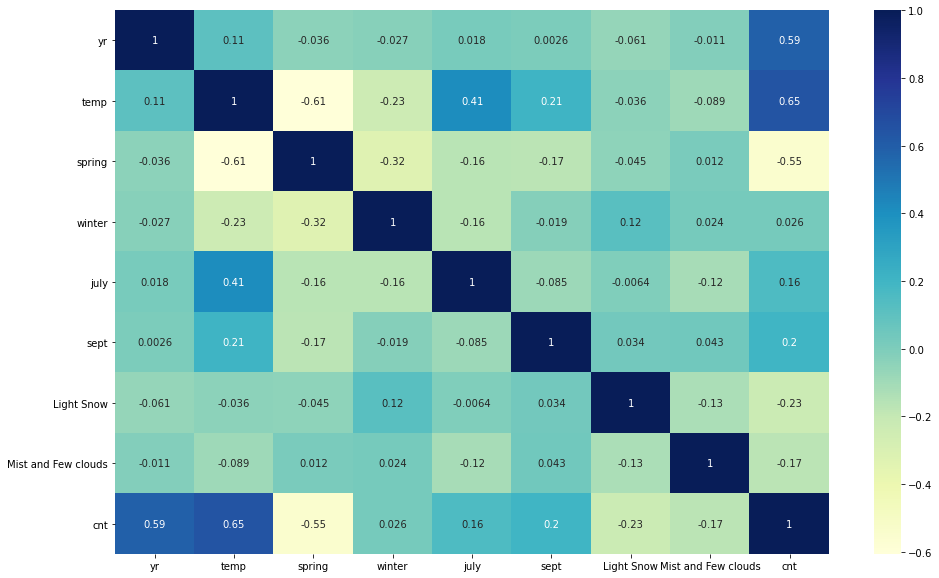

In [270]:
# Lets plot this on a heat map
plt.figure(figsize=(16,10))
sns.heatmap(X_tarin_for_corr.corr(), annot= True, cmap="YlGnBu")
plt.show()

In [274]:
# Applying scaler() 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bb_test[num_vars] = scaler.transform(bb_test[num_vars])

In [275]:
y_test = bb_test.pop('cnt')
X_test = bb_test

In [276]:
# using our model to make predictions.

X_test_new = X_test[X_train_new.columns]


X_test_new = sm.add_constant(X_test_new)

In [277]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [278]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.8092270264746741

In [ ]:
# Model Evaluation

Text(0, 0.5, 'y_pred')

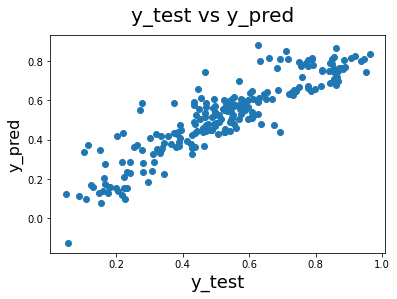

In [279]:
fig = plt.figure()
plt.scatter(y_test, y_pred)

fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)   

In [280]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE= np.sqrt(MSE)

print("Mean Absolute Error", MAE)
print("Mean Squared Error", MSE)
print("Root Mean Squared Error",RMSE)

Mean Absolute Error 0.07296184473090396
Mean Squared Error 0.009121672278610079
Root Mean Squared Error 0.09550744619457731
